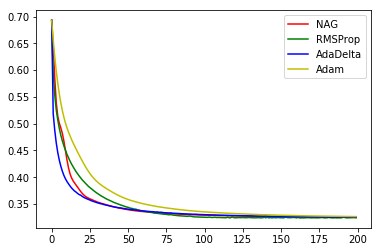

In [3]:
from sklearn.datasets import load_svmlight_file
import numpy as np
import random
import matplotlib.pyplot as plt



def sigmoid(x):
    return 1 / (np.exp(-x) + 1)


def loss(x, y, w):
    Xw = x.dot(w)
    return -(np.dot(y.T, np.log( sigmoid(Xw) )) + (1 - y).T.dot(np.log(1 - sigmoid(Xw) )))[0]




def NAG(x_train, y_train, x_val, y_validation, batch_size, learning_rate, gamma,Iteration_num):


    NAGW = np.zeros((x_train.shape[1], 1))
    v = np.zeros((x_train.shape[1], 1))
    loss_val = []

    for i in range(Iteration_num):

        index = random.sample(list(np.arange(0, x_train.shape[0])), batch_size)
        x = x_train[index, :]
        y = y_train[index, :]

        #NAG
        los = loss(x_val, y_validation, NAGW) / x_val.shape[0]
        loss_val.append(los)
        g = x.T.dot(sigmoid(np.dot(x, NAGW - gamma * v)) - y) / x.shape[0]
        v = gamma * v + learning_rate * g
        NAGW = NAGW - v

    return loss_val


def RMSProp(x_train, y_train, x_validation, y_validation, batch_size, learning_rate, gamma, epsilon,Iteration_num):

    RMSPropW = np.zeros((x_train.shape[1], 1))
    G = np.zeros((x_train.shape[1], 1))
    loss_val = []

    for i in range(Iteration_num):
        index = random.sample(list(np.arange(0, x_train.shape[0])), batch_size)
        x = x_train[index, :]
        y = y_train[index, :]

        #RMSProp
        los = loss(x_validation, y_validation, RMSPropW) / x_validation.shape[0]
        loss_val.append(los)
        g = x.T.dot(sigmoid(np.dot(x, RMSPropW)) - y) / x.shape[0]
        G = gamma * G + (1 - gamma) * g * g
        RMSPropW = RMSPropW - learning_rate / np.sqrt(G + epsilon) * g

    return loss_val


def AdaDelta(x_train, y_train, x_validation, y_validation, batch_size, gamma, epsilon,Iteration_num):

    AdaDeltaW = np.zeros((x_train.shape[1], 1))
    G = np.zeros((x_train.shape[1], 1))
    delta = np.zeros((x_train.shape[1], 1))
    loss_val = []

    for i in range(Iteration_num):
        index = random.sample(list(np.arange(0, x_train.shape[0])), batch_size)
        x = x_train[index, :]
        y = y_train[index, :]

        los = loss(x_validation, y_validation, AdaDeltaW) / x_validation.shape[0]
        loss_val.append(los)
        #AdaDelta
        g = x.T.dot(sigmoid(np.dot(x, AdaDeltaW)) - y) / x.shape[0]
        G = gamma * G + (1 - gamma) * g * g
        delta_w = - np.sqrt(delta + epsilon) / np.sqrt(G + epsilon) * g
        AdaDeltaW = AdaDeltaW + delta_w
        delta = gamma * delta + (1 - gamma) * delta_w * delta_w

    return loss_val


def Adam(x_train, y_train, x_validation, y_validation, batch_size, learning_rate, beta, gamma, epsilon,Iteration_num):

    AdamW = np.zeros((x_train.shape[1], 1))
    G = np.zeros((x_train.shape[1], 1))
    m = np.zeros((x_train.shape[1], 1))

    loss_val = []

    for i in range(Iteration_num):
        index = random.sample(list(np.arange(0, x_train.shape[0])), batch_size)
        x = x_train[index, :]
        y = y_train[index, :]

        los = loss(x_validation, y_validation, AdamW) / x_validation.shape[0]
        loss_val.append(los)

        #Adam
        g = x.T.dot(sigmoid(np.dot(x, AdamW)) - y) / x.shape[0]
        m = beta * m + (1.0 - beta) * g
        G = gamma * G + (1.0 - gamma) * g * g
        alpha = learning_rate * np.sqrt(1.0 - gamma**(i + 1)) / (1.0 - beta**(i + 1))
        AdamW = AdamW - alpha * m / np.sqrt(G + epsilon)


    return loss_val



def main():
    data_train = load_svmlight_file("D:\\RL\\a9a.txt")
    data_validation = load_svmlight_file('D:\\RL\\a9a.t', n_features=123)

    x_train = data_train[0].toarray()
    y_train = data_train[1].reshape(x_train.shape[0], 1)

    x_val = data_validation[0].toarray()
    y_val = data_validation[1].reshape(x_val.shape[0], 1)

    x_train_con = np.ones((x_train.shape[0], 1), dtype='float')
    x_val_con = np.ones((x_val.shape[0], 1), dtype='float')



    x_train = np.concatenate((x_train_con, x_train), axis=1)
    x_val = np.concatenate((x_val_con, x_val), axis=1)


    for i in range(y_train.shape[0]):
        if y_train[i] == -1:
            y_train[i] = 0

    for i in range(y_val.shape[0]):
        if y_val[i] == -1:
            y_val[i] = 0



    NAGLoss = []
    RMSPropLoss = []
    AdaDeltaLoss = []
    AdamLoss = []


    batchSize = 5000
    IterationNum = 200
    #NAG
    NAGLearnRate = 0.1
    NAGGamma = 0.9

    #RMSProp
    RMSPropLearnRate = 0.01
    RMSPropGamma = 0.9
    RMSPropEpsilon = 1e-8

    #AdaDelta
    #AdaDeltaLearnRate = 0.1
    AdaDeltaGamma = 0.95
    AdaDeltaEpsilon = 0.001

    #Adam
    AdamLearnRate = 0.01
    AdamGamma = 0.999
    AdamEpsilon = 1e-8
    AdamBeta = 0.9


    NAGLoss = NAG(x_train, y_train, x_val, y_val, batch_size=batchSize, learning_rate=NAGLearnRate, gamma=NAGGamma,Iteration_num = IterationNum)
    RMSPropLoss = RMSProp(x_train, y_train, x_val, y_val, batch_size=batchSize, learning_rate=RMSPropLearnRate, gamma=RMSPropGamma, epsilon=RMSPropEpsilon,Iteration_num = IterationNum)
    AdaDeltaLoss = AdaDelta(x_train, y_train, x_val, y_val, batch_size=batchSize, gamma=AdaDeltaGamma, epsilon=AdaDeltaEpsilon,Iteration_num = IterationNum)
    AdamLoss = Adam(x_train, y_train, x_val, y_val, batch_size=batchSize, learning_rate=AdamLearnRate, beta=AdamBeta, gamma=AdamGamma, epsilon=AdamEpsilon,Iteration_num = IterationNum)

    NAGLen = np.arange(0, len(NAGLoss))
    RMSPropLen = np.arange(0, len(NAGLoss))
    AdaDeltaLen = np.arange(0, len(NAGLoss))
    AdamLen = np.arange(0, len(NAGLoss))


    plot1, = plt.plot(NAGLen, NAGLoss, 'r')
    plot2, = plt.plot(RMSPropLen, RMSPropLoss, 'g')
    plot3, = plt.plot(AdaDeltaLen, AdaDeltaLoss, 'b')
    plot4, = plt.plot(AdamLen, AdamLoss, 'y')
    plt.legend([ plot1, plot2, plot3, plot4], [ 'NAG', 'RMSProp', 'AdaDelta', 'Adam'])
    plt.show()


if __name__ == '__main__':
    main()